In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("green_tripdata_2015-09.csv")

## Question 2
Plot a histogram of the number of the trip distance ("Trip Distance")
At first, I plot the histogram of the number of the trip distance with outliers.
And then I removed outliers. I kept only the ones that are within +3 to -3 standard deviations from the median in the column 'Trip_distance'.

The plot without outliers shows that the trip distance has a asymmetrically distrbution. 
Also, because the values in distance are positive, they create a right skewed curve.

#### Structure: The historam of the data shows that distance has structure of lognormal distribution.
#### Hypothesis: The peack in short distances (less than 2 miles) can show the fact that people commonly take rides for short distance.


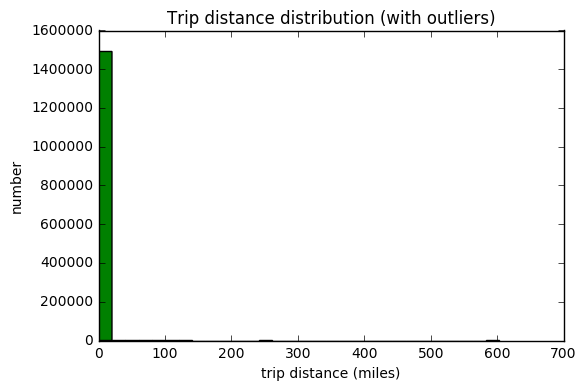

In [5]:
# question2, Plot a histogram of the number of the trip distance with outliers
x = df["Trip_distance"]
num_bins = 30
# the histogram of the data
plt.hist(x, num_bins, facecolor='green')
plt.xlabel('trip distance (miles)')
plt.ylabel('number')
plt.title('Trip distance distribution (with outliers)')
# plt.legend("")
plt.show()

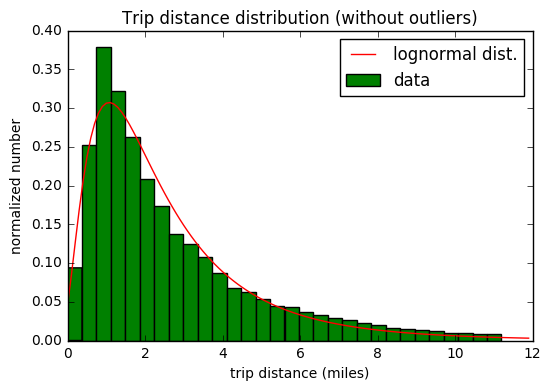

In [4]:
# question2, Plot a histogram of the number of the trip distance without outliers
x = df["Trip_distance"]
# Remove outliers (+/- 3 std)
outlier = (x-x.median()).abs()>3*x.std()
x = x[~(outlier)]
num_bins = 30
# the histogram of the data
plt.hist(x, num_bins, normed=1 ,facecolor='green')
scatter,loc,mean = lognorm.fit(x, scale=x.mean(),loc=0)
pdf_fitted = lognorm.pdf(np.arange(0,12,.1),scatter,loc,mean)
plt.plot(np.arange(0,12,.1),pdf_fitted,'r')
plt.xlabel('trip distance (miles)')
plt.ylabel('normalized number')
plt.title('Trip distance distribution (without outliers)')
plt.legend(['lognormal dist.','data'])
plt.show()